<a href="https://colab.research.google.com/github/fisherj1/NN/blob/master/les1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
import matplotlib.pyplot as plt

In [14]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[0]

5

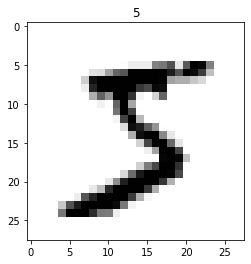

In [ ]:
plt.title(y_train[0])
plt.imshow(x_train[0], cmap=plt.get_cmap('gray_r'))
plt.show()

In [ ]:
def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

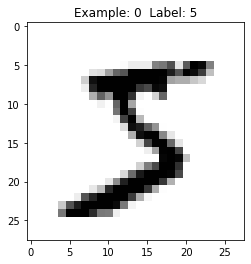

In [ ]:
display_digit(0)

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1232 - accuracy: 0.9635
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0869 - accuracy: 0.9740


In [18]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 0s 989us/step - loss: 0.0973 - accuracy: 0.9707
Loss = 0.09728383272886276, accuracy = 0.9707000255584717


In [19]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0680 - accuracy: 0.9798
Loss = 0.06799617409706116, accuracy = 0.9798333048820496


In [ ]:
predictions = model.predict(x_test[0:1,:,:])
print(predictions)
print(y_test[0])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7


In [20]:
(x2_train, y2_train),(x2_test, y2_test) = mnist.load_data()
x2_train, x2_test = x2_train, x2_test

In [ ]:
model.fit(x2_train, y2_train, epochs=3)


In [21]:
loss, acc = model.evaluate(x2_test, y2_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 0s 1ms/step - loss: 14.5433 - accuracy: 0.9718
Loss = 14.543282508850098, accuracy = 0.9718000292778015


In [22]:
loss, acc = model.evaluate(x2_train, y2_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 7.5474 - accuracy: 0.9810
Loss = 7.547374248504639, accuracy = 0.9809666872024536
